In [1]:
import csv
import random
import matplotlib.pyplot as plt

In [2]:
file = open('IIM.csv', 'r')
csvreader = csv.reader(file)
data = list(csvreader)
n = len(data)

In [3]:
prev_changes = []
for i in range(2, n):
    # change = (yesterday's price - today's price) / yesterday's price
    prev_changes.append((float(data[i-1][1])-float(data[i][1]))/float(data[i-1][1]))

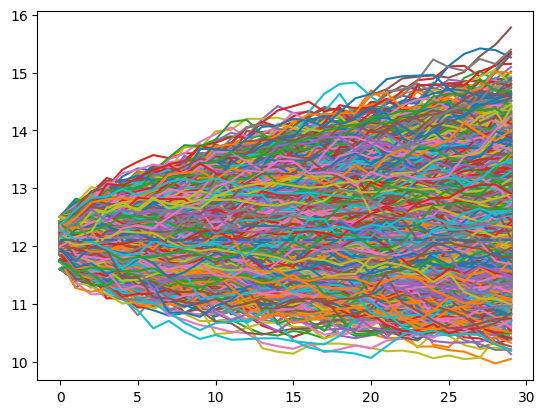

In [32]:
price30 = []
simnum = 10000
for sim in range(simnum):
    last_price = float(data[n-1][1])
    prices = []
    for i in range(30):
        last_price = last_price + last_price*random.choice(prev_changes)
        prices.append(last_price)
    price30.append(last_price)
    x = [ i for i in range(30)]
    plt.plot(x, prices)
x = [i for i in range(30)]
y = [float(data[n-1][1]) for i in range(30)]
plt.plot(x, y, linestyle='-.')
plt.show()
file.close()

Base value:  12.1
simulated range  after 30 days:  10.046164599637478 to 15.781449455129708
Confidence of appreceation: 72.39%
Confidence of depreceation: 27.61%
Confidence of neutral: 0.0%


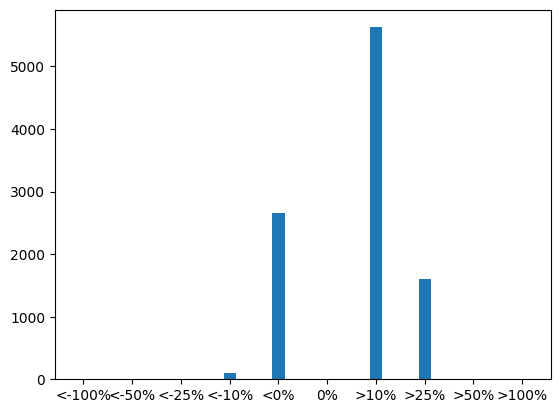

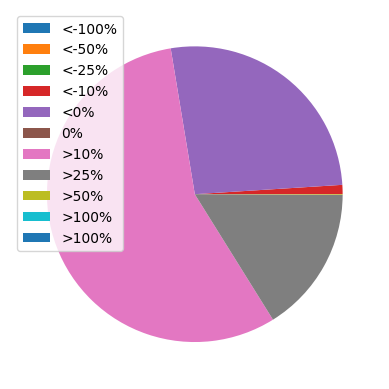

In [37]:
base_price = float(data[n-1][1])
pos, neg, nut = 0, 0, 0
maxp, minp = 0, 999999
profit = [0 for i in range(11)]
mylabels = ['<-100%', '<-50%', '<-25%', '<-10%', '<0%', '0%', '>10%', '>25%', '>50%', '>100%', '>100%']
for x in price30:
    maxp = max(maxp, x)
    minp = min(minp, x)
    margin = (x-base_price)/base_price
    if margin>1:
        profit[10]+=1
    elif margin>0.5:
        profit[9]+=1
    elif margin>0.25:
        profit[8]+=1
    elif margin>0.1:
        profit[7]+=1
    elif margin>0:
        profit[6]+=1
    elif margin==0:
        profit[5]+=1
    elif margin<-1:
        profit[0]+=1
    elif margin<-0.5:
        profit[1]+=1
    elif margin<-0.25:
        profit[2]+=1
    elif margin<-0.1:
        profit[3]+=1
    elif margin<0:
        profit[4]+=1
    if x>base_price:
        pos+=1
    elif x<base_price:
        neg+=1
    else:
        nut+=1
print('Base value: ', base_price)
print('simulated range  after 30 days: ', minp, 'to', maxp)
print('Confidence of appreceation: '+ str((pos/simnum)*100)+'%')
print('Confidence of depreceation: '+ str((neg/simnum)*100)+'%')
print('Confidence of neutral: '+ str((nut/simnum)*100)+'%')
plt.bar(mylabels,profit, width=0.25)
# plt.legend(mylabels)
plt.show()
plt.pie(profit, startangle=0)
plt.legend(mylabels)
plt.show()